# Clase 15: Manejo de Valores Faltantes

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

**Profesor: Ignacio Meza**


## Roadmap


![ML ops](https://camo.githubusercontent.com/4724bc1636a3fee34f87a1fac991fc4ccd270c0a3a510db04394f90b05d065eb/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f4d4453373230322f4d4453373230322f6d61696e2f7265637572736f732f323032332d30312f31332d4544412f6d65746f646f6c6f6769612e706e67)


## Objetivos de la Clase

- Comprender que es un pipeline.
- Entender la complejidad de tener datos faltantes para los modelos.
- Entender los distintos tipos de datos faltantes.
- Explorar las opciones para solucionar el problema de datos faltantes.
- Integrar los conocimientos adquiridos al pipeline.

---

## Antes de comenzar la clase...

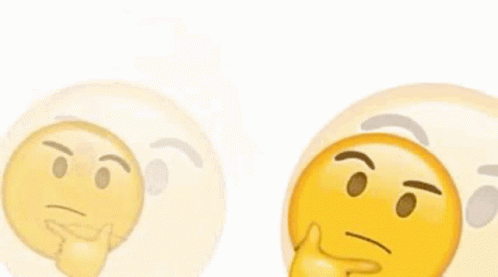

> **Pregunta 1❓**: ¿Cuál es nuestro objetivo realizando Feature Engineering?

> **Pregunta 2❓**: ¿Qué se necesita para realizar Feature Engineering?

> **Pregunta 3❓**: ¿Ejemplos de algunos procesos que se realizan en el Feature Engineering?

> **Pregunta 4❓**: ¿Qué problemas podrían causar algunos métodos de Feature Engineering vistos en la clase pasada?

---

## Dataset - House Pricing

![House Pricing](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

Fuente: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

El dataset **`house pricing`** consiste en 80 variables (79 variables explicativas más una variable objetivo) que describen aspectos fundamentales de hogares residenciales en la ciudad de *Ames, Iowa*. 

La variable objetivo es el precio final de cada hogar (regresión)

In [1]:
import pandas as pd

df = pd.read_csv("./resources/train.csv", index_col="Id")
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [2]:
cat_cols = [
    "MSZoning",
    "Street",
    "Alley",
    "LandContour",
    "LotConfig",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "Foundation",
    "Heating",
    "CentralAir",
    "Electrical",
    "GarageType",
    "PavedDrive",
    "MiscFeature",
    "SaleType",
    "SaleCondition",
]

ordinal_cols = [
    "LotShape",
    "Utilities",
    "LandSlope",
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Fence",
]

# Adquieren las categorias de cada variable
ordinal_cat = [
    ["Reg", "IR1", "IR2", "IR3"],
    ["AllPub", "NoSewr", "NoSeWa", "ELO"],
    ["Gtl", "Mod", "Sev"],
    ["Po", "Fa", "TA", "Gd", "Ex"],
    ["Po", "Fa", "TA", "Gd", "Ex"],
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    ["NA", "No", "Mn", "Av", "Gd"],
    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    ["Po", "Fa", "TA", "Gd", "Ex"],
    ["Po", "Fa", "TA", "Gd", "Ex"],
    ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    ["NA", "Unf", "RFn", "Fin"],
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    ["NA", "Fa", "TA", "Gd", "Ex"],
    ["NA", "MnWw", "GdWo", "MnPrv", "GdPrv"],
]

num_cols = [
    "MSSubClass",
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "MoSold",
    "YrSold",
]

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Flujos de transformación con Pipelines

La manera anterior es bastante clara de comprender, sin embargo, es redundante y repite muchos patrones de asiganción tediosos. Los `Pipelines` están diseñados para resolver este problema.


Las transformaciones en un dataset son combinadas entre si, hasta obtener una versión ordenada de los datos, posteriormente, estas se combinan con estimadores para formar un flujo de trabajo *input-output*. En Sckit-Learn el flujo antes nombrado de denomina *composite estimator* y se construye por medio de objetos tipo `Pipeline`.


### Como Definimos un Pipeline

Un pipeline es una lista de tuplas. 

- La lista contiene todos los pasos que se efectuan desde la entrada hasta la salida del pipeline
- Cata tupla de la lista representa un subproceso del pipeline. Este debe estar compuesto por un nombre u la clase que corresponda.

![Pipeline](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/14-Feature-Engineering/pipeline.png?raw=true)

Por ejemplo, para la imágen anterior, el pipeline sería: 

```python
pipe = Pipeline([('scaling', Scaler()),
                 ('dimensionality_reduction', DimReductor()),
                 ('predictive_model', Model())])
```

#### ¿Por qué debería usar pipelines? 🤨

1. **Simplificación del proceso de aprendizaje automático**: Los Pipelines permiten combinar múltiples pasos en el proceso de aprendizaje automático, como el preprocesamiento de datos, la selección de características y el entrenamiento del modelo, en una única entidad. Esto simplifica el flujo de trabajo general y reduce las posibilidades de errores.

2. **Procesamiento de datos consistente**: Los Pipelines aseguran que los mismos pasos de preprocesamiento de datos se apliquen de manera consistente tanto a los datos de entrenamiento como a los de prueba. Esto reduce el riesgo de sobreajuste (producto de un data-leakage) y facilita la comparación del rendimiento de diferentes modelos.

3. **Ajuste de hiperparámetros fácil**: Los Pipelines permiten ajustar los hiperparámetros de varios pasos en el proceso de aprendizaje automático simultáneamente utilizando la búsqueda en cuadrícula o la búsqueda aleatoria. Esto puede ayudar a encontrar la combinación óptima de hiperparámetros y mejorar el rendimiento del modelo.

4. **Legibilidad y reutilización de código**: Los Pipelines proporcionan una forma clara y concisa de organizar el código, lo que facilita su lectura y mantenimiento. También permiten reutilizar la misma tubería para diferentes conjuntos de datos y modelos, ahorrando tiempo y esfuerzo.

5. **Mejora del rendimiento**: Al reducir la cantidad de manipulación de datos y cálculo requerido, los pipelines pueden llevar a tiempos de entrenamiento e inferencia de modelos más rápidos. Esto puede ser especialmente útil al trabajar con conjuntos de datos grandes o modelos complejos.

En este caso, observamos que las transformaciones numéricas corresponden a un reshape, luego a escalar los datos y finalmente a transformarlos según el método de Yeo-Johnson.

> **Ejercicio 📝**

1. Genere un trasformador personalizado que permita transformar los datos de una pipeline diseñada sobre arreglos unidimensionales en series de Pandas. La función a implementar debe recibir un arreglo y un nombre de columna, debe entregar una serie con los datos transformados cuyo nombre es el nombre de la columna procesada. Añada este último transformador a las pipelines `cat_pipe` y `num_pipe`.

### ColumnTransformer

Es muy frecuente, es que los datos sea heterogéneos por ejemplo, es normal encontrar datasets con variables ordinales, categoricas, y numéricas. 

Para utilizar *pipelines* en este contexto, se necesitaria definir una por cada variable, repitiendo varios componentes de código entre variables que son del mismo tipo, esto resulta en una redundancia excesiva que se puede atacar por medio de objetos tipo `ColumnTransformer`. Estos objetos permite separar flujos de preprocesamiento, permitiendo seleccionar por columna o grupos de columna dentro de una *pipeline*.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
LotArea_pipe = Pipeline([('scaler', MinMaxScaler()),
                        ('yeo-johnson', PowerTransformer(method='yeo-johnson'))
                        ])

preprocessing_transformer = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(),  ['Neighborhood', 'Utilities', 'Foundation']),
        ('StandardScaler', StandardScaler(),['OverallQual', 'OverallCond', 'GarageCars', 'GarageArea']), 
        ('PowerTransform', LotArea_pipe, ['LotArea'])])

In [ ]:
housing_pipeline = Pipeline([
    ('Preprocessing', preprocessing_transformer)
])

Finalmente se aplican los procedimientos planificados en la variable `prep`

In [ ]:
df_preprocesado = housing_pipeline.fit_transform(df)
df_preprocesado

In [ ]:
df_preprocesado = pd.DataFrame(df_preprocesado.toarray())
df_preprocesado

> **Pregunta ❓**: ¿Qué sucedio con el resto de las columnas?

Nota que en este momento el Pipeline solo cuenta con una etapa de preprocesado. Sin embargo, la idea es que a futuro tenga el resto de los pasos de nuestro proyecto.


```python
housing_pipeline = Pipeline([
    ('Imputación', Imputador()),
    ('Preprocessing', Preprocesador()),
    ('Selector de Variables', SelectorDeVariables()),
    ('Reduccion de Dimensionalidad', ReduccionDeDimensionalidad()),
    ('Modelo', Modelo())

])
```

## En resumen... un Pipeline... 🧪


Un pipeline es una lista de tuplas. 

- La lista contiene todos los pasos que se efectuan desde la entrada hasta la salida del pipeline
- Cata tupla de la lista representa un subproceso del pipeline. Este debe estar compuesto por un nombre u la clase que corresponda.

Por ejemplo, para la imágen anterior, el pipeline sería: 

```python
pipe = Pipeline([('scaling', Scaler()),
                 ('dimensionality_reduction', DimReductor()),
                 ('predictive_model', Model())])
```

In [1]:
# Preprocesador Compuesto
preprocessing = ColumnTransformer(
    transformers=[
        ("standard_scaler", StandardScaler(), num_cols),
        (
            "category_one_hot",
            OneHotEncoder(sparse=False, handle_unknown="ignore"),
            cat_cols,
        ),
        ("ordinal_encoder", OrdinalEncoder(categories=ordinal_cat), ordinal_cols),
    ]
)

NameError: name 'ColumnTransformer' is not defined

In [10]:
preprocessing.transformers[0][1]

StandardScaler()

In [5]:
pipe = Pipeline([("Preprocessing", preprocessing)])
pipe

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   '.

## Exploración de Datos Faltantes



In [11]:
# Instalamos el paquete usando conda o pip
import sys

import matplotlib.pyplot as plt

try:
    import missingno as msno
except ImportError as e: 
    !{sys.executable} -m pip install --upgrade missingno # descomentar si se usa pip
    
import missingno as msno

### Conteo de Datos no Nulos

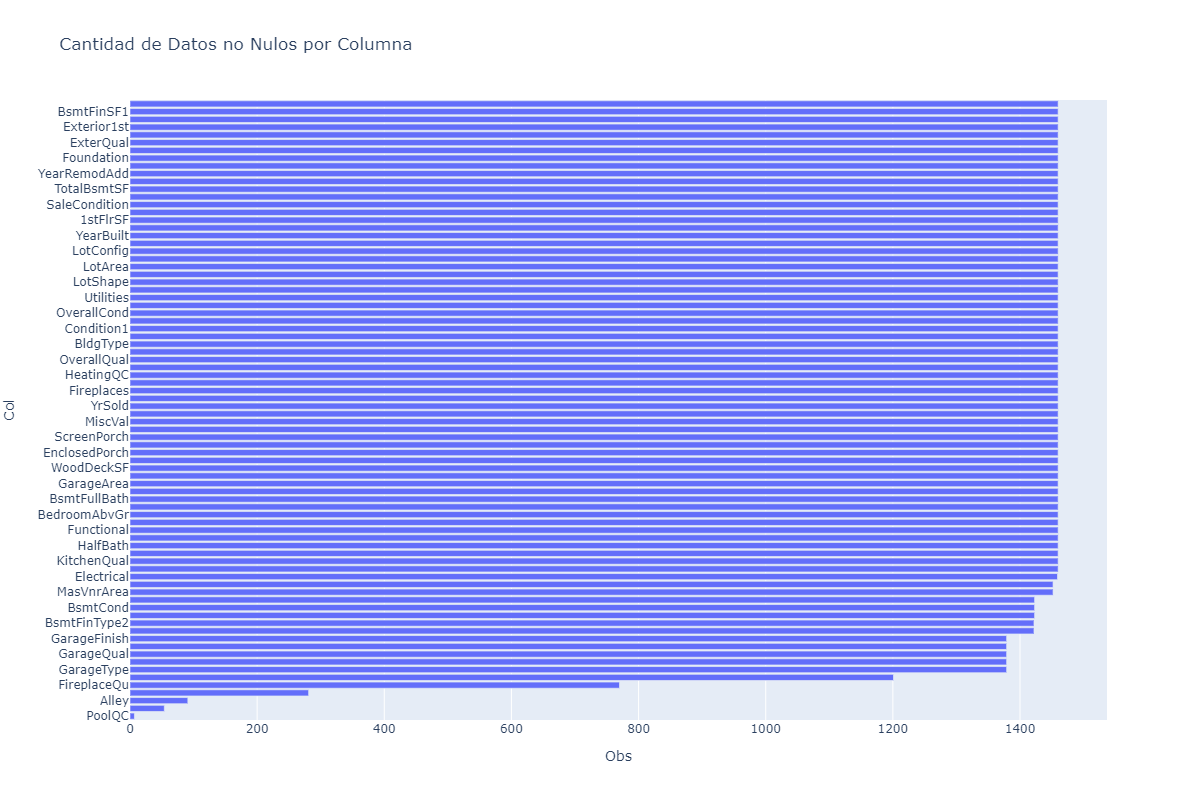

In [12]:
import plotly.express as px

conteo_nulos = (
    (len(df) - df.isna().sum())
    .to_frame("Obs")
    .reset_index()
    .rename(columns={"index": "Col"})
)

px.bar(
    conteo_nulos.sort_values("Obs"),
    x="Obs",
    y="Col",
    height=800,
    title="Cantidad de Datos no Nulos por Columna",
)

### Nullity Matrix

Permite visualizar los datos faltantes a traves de barras. 
Cada espacio en gris representa una observación y cada espacio en blanco simboliza un dato faltante.

<AxesSubplot:>

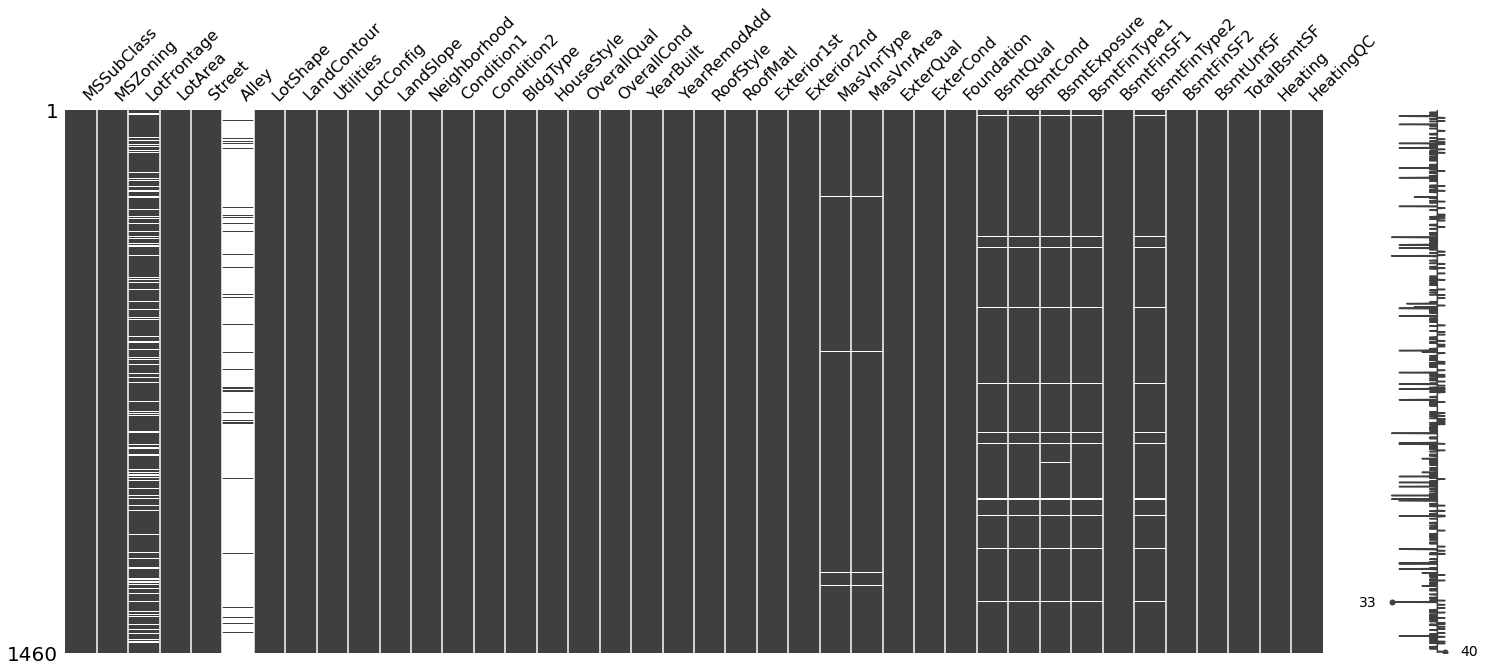

In [13]:
msno.matrix(df.iloc[:, :40])

<AxesSubplot:>

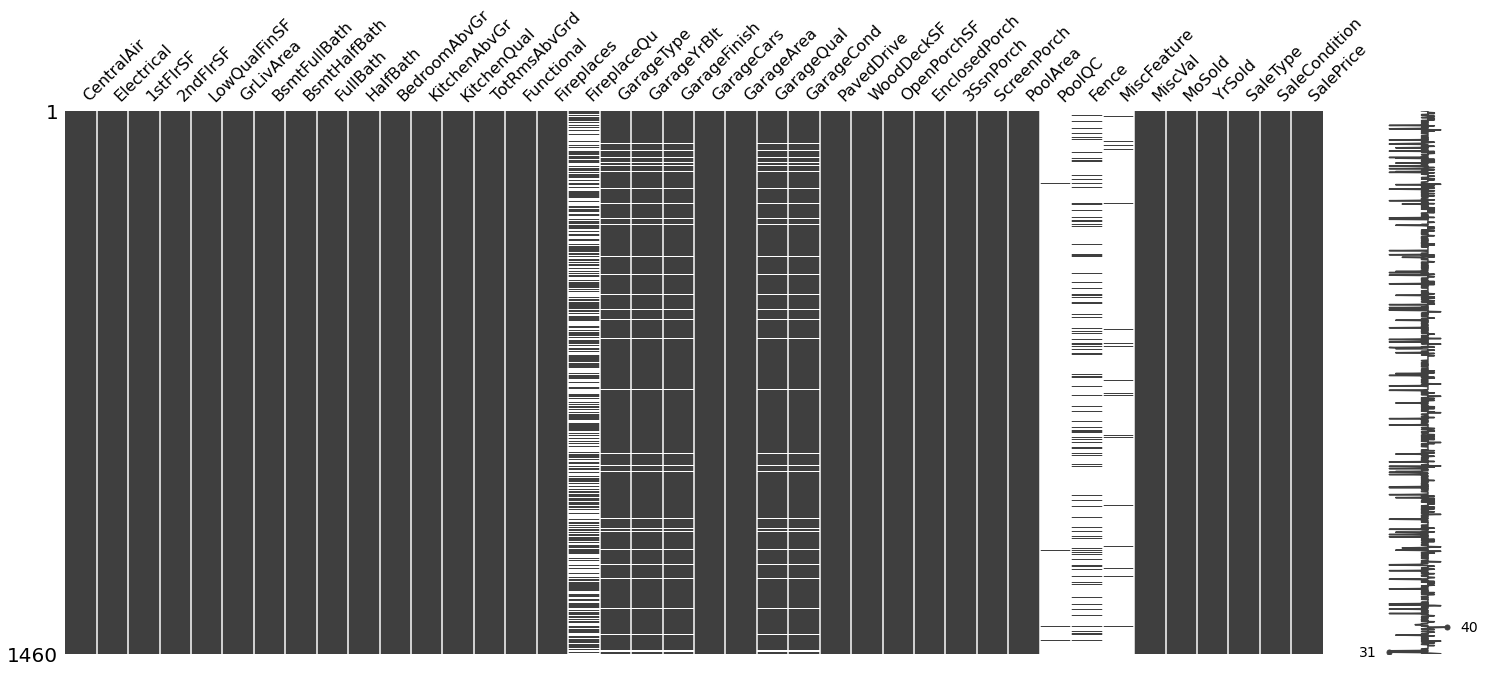

In [14]:
msno.matrix(df.iloc[:, 40:])

In [15]:
df.loc[:, ["Fireplaces", "FireplaceQu"]]

Fireplaces FireplaceQu
Id                          
1              0         NaN
2              1          TA
3              1          TA
4              1          Gd
5              1          TA
...          ...         ...
1456           1          TA
1457           2          TA
1458           2          Gd
1459           0         NaN
1460           0         NaN

[1460 rows x 2 columns]

> **Pregunta ❓**: ¿Qué representan las variables con mayor falta de información?




### Mapa de Calor


El mapa de calor se utiliza para identificar las correlaciones de nulidad (relación en la presencia de valores) entre las columnas. 

- Los valores cercanos a 1 indican que la presencia de valores nulos en una columna está correlacionada con la presencia de valores nulos en otra columna.

- Los valores cercanos a -1 indican que la presencia de valores nulos en una columna está inversamente correlacionada con la presencia de valores nulos en otra columna. En otras palabras, cuando los valores nulos están presentes en una columna, hay valores de datos presentes en la otra columna, y viceversa.

- Los valores cercanos a 0, indican que hay poca o ninguna relación entre la presencia de valores nulos en una columna en comparación con otra.

<AxesSubplot:>

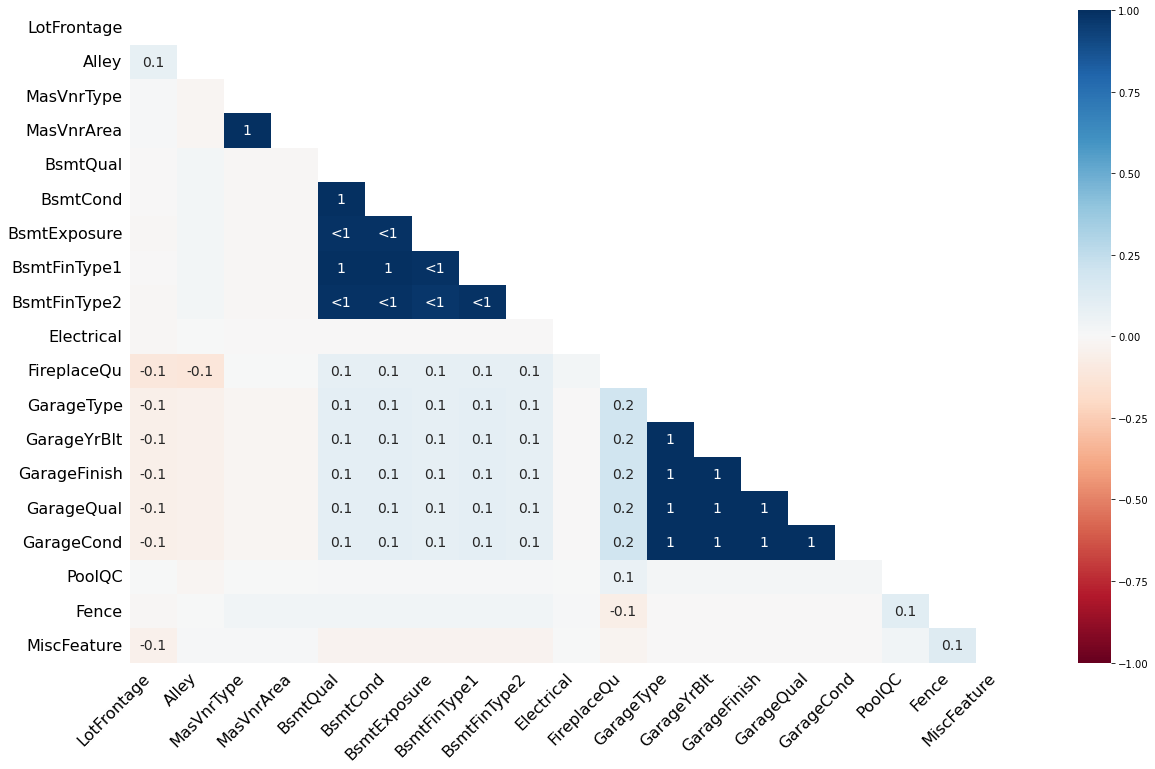

In [16]:
import matplotlib.pyplot as plt

msno.heatmap(df)

## Manejo de valores faltantes

Por lo general, existen razones prácticas y conceptuales a tener en cuenta cuando se trabaja con valores faltantes. 

### Conceptual

**La falta de información introduce sesgos en los modelos de datos**, pues hace que las muestras obtenidas no sean representativas del fenómeno que se desea estudiar. Esto puede generar conclusiones sesgadas y puede llevar a tomar malas decisiones. 

### Práctica

**Los valores faltantes son incompatibles con algunos modelos de aprendizaje automático**, debido a que estos modelos son parte de la razón fundamental de analizar un fenómeno por medio de datos,es que se necesita comprender bien los mecanismos de manejo de este tipo de valores. 


### Tipos de datos Faltantes

Para el ejemplo, supongamos que efectuamos una encuesta a una población acerca de datos demográficos y de salarios.

|  | MCAR | MAR | MNAR |
|---|---|---|---|
| **Nombre** | Missing completely at random | Missing at Random | Missing not at Random |
| **Descripción** | Es el caso en que los datos faltantes son aleatorios y que esta falta no puede ser explicada por ninguna otra variable del dataset. <br>En este caso es util pensar que cualquier observación tiene una probabilidad de perderse y las que no están, simplemente se perdieron por azar. | Es el caso en que la perdida de datos está relacionado con alguna otra variable (no con si misma), pero la falta de información es aleatoria.<br>En este caso, la falta de información no es al azar.  | Es el caso en que los datos faltantes están relacionados con la variable en si. Es el peor tipo de dato faltante ya que lleva a calcular estadísticas descriptivas sesgadas. |
| **Ejemplo** | Una de las preguntas en la encuesta era la altura, cuya respuesta era opcional. Al revisar los resultados de la encuesta, notas que falta el 37% de los valores `altura`.<br><br>En este caso, no hay ningún patrón de perdida, es simplemente aleatorio.  | A partir de los 50 años, las personas tienden a dejar de entregar información respecto a su sueldo.<br><br>El patrón de perdida en este caso es la edad: desde los 50 años, la información sobre el sueldo tiende a faltar aleatoriamente. | Personas con sueldos mayores a los 1.250.000$ tienden a no informar su sueldo.<br><br>El patrón de perdida de información en este caso es el sueldo en si y no se relaciona con ninguna otra variable. |
| **Solución** | Eliminar las filas que no contengan los datos o imputar valores (por ejemplo, reemplazar los faltantes por la media, moda o mediana). | Imputar (en el ejemplo podría ser una regresión edad-sueldo) | Intentar recuperar esos datos de la fuente original del dataset, cruzar con otros datasets. |

### Análisis de Algunas Variables Según Tipo

<AxesSubplot:>

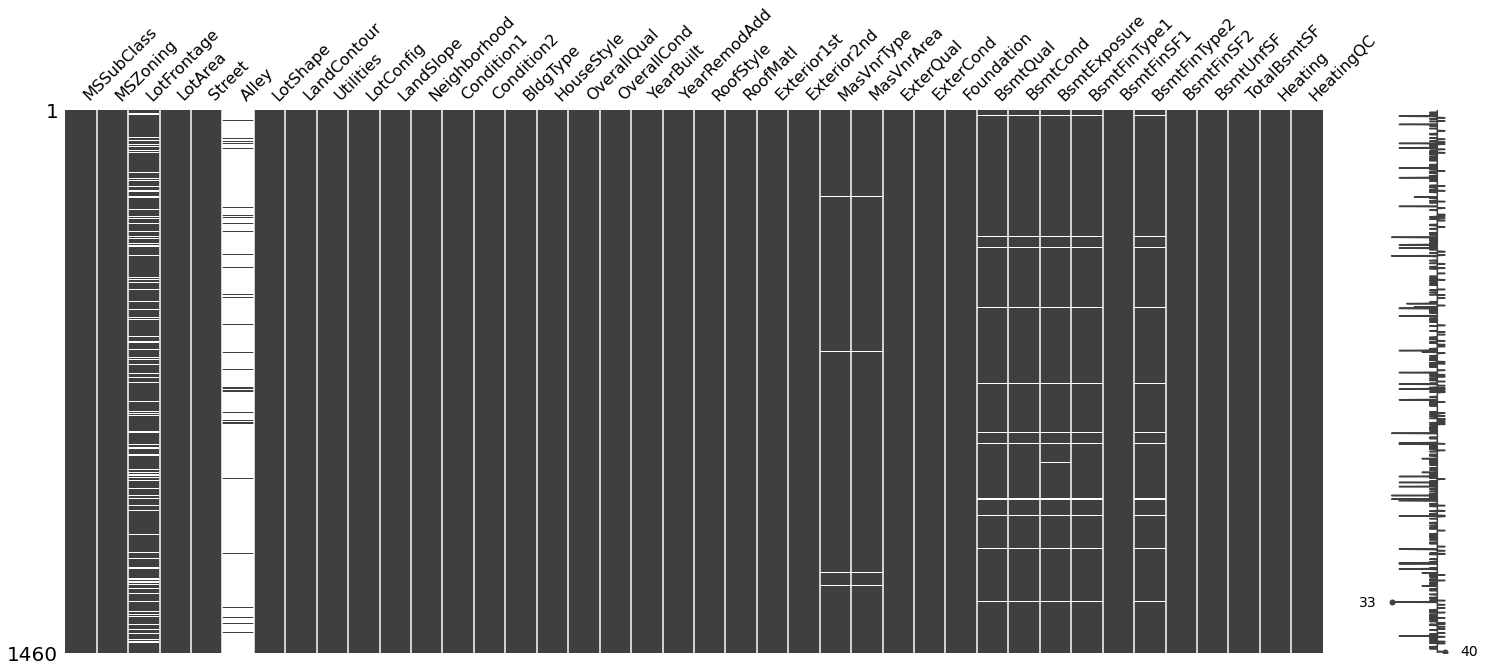

In [17]:
msno.matrix(df.iloc[:, :40])

In [18]:
df.loc[:, ["Alley"]]

Alley
Id        
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
...    ...
1456   NaN
1457   NaN
1458   NaN
1459   NaN
1460   NaN

[1460 rows x 1 columns]

In [26]:
df.loc[:, "Alley"].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [27]:
# Existirá relación con alguna otra variable?
df.loc[:, ["Street", "Alley"]]

Street Alley
Id               
1      Pave   NaN
2      Pave   NaN
3      Pave   NaN
4      Pave   NaN
5      Pave   NaN
...     ...   ...
1456   Pave   NaN
1457   Pave   NaN
1458   Pave   NaN
1459   Pave   NaN
1460   Pave   NaN

[1460 rows x 2 columns]

In [28]:
# Eliminamos los nulos para ver si hay alguna relación
df.loc[:, ["Street", "Alley"]].dropna()

Street Alley
Id               
22     Pave  Grvl
31     Pave  Pave
57     Pave  Pave
80     Pave  Grvl
88     Pave  Pave
...     ...   ...
1405   Pave  Grvl
1415   Pave  Pave
1428   Pave  Grvl
1433   Pave  Grvl
1455   Pave  Pave

[91 rows x 2 columns]

> **Pregunta ❓:** ¿Qué tipo de dato faltante es?

#### Alley (Callejón de Entrada)

Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

### LotFrontage

LotFrontage: Linear feet of street connected to property

In [22]:
df.loc[:, ["LotFrontage"]]

LotFrontage
Id               
1            65.0
2            80.0
3            68.0
4            60.0
5            84.0
...           ...
1456         62.0
1457         85.0
1458         66.0
1459         68.0
1460         75.0

[1460 rows x 1 columns]

In [23]:
df.loc[df["LotFrontage"].isna(), :]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
8             60       RL          NaN    10382   Pave   NaN      IR1   
13            20       RL          NaN    12968   Pave   NaN      IR2   
15            20       RL          NaN    10920   Pave   NaN      IR1   
17            20       RL          NaN    11241   Pave   NaN      IR1   
25            20       RL          NaN     8246   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1430          20       RL          NaN    12546   Pave   NaN      IR1   
1432         120       RL          NaN     4928   Pave   NaN      IR1   
1442         120       RM          NaN     4426   Pave   NaN      Reg   
1444          30       RL          NaN     8854   Pave   NaN      Reg   
1447          20       RL          NaN    26142   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
8            Lvl    AllPub    Corner  ...        0    NaN    NaN        Shed   
13           Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
15           Lvl    AllPub    Corner  ...        0    NaN   GdWo         NaN   
17           Lvl    AllPub   CulDSac  ...        0    NaN    NaN        Shed   
25           Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1430         Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
1432         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1442         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1444         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1447         Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
8        350     11    2009        WD         Normal     200000  
13         0      9    2008        WD         Normal     144000  
15         0      5    2008        WD         Normal     157000  
17       700      3    2010        WD         Normal     149000  
25         0      5    2010        WD         Normal     154000  
...      ...    ...     ...       ...            ...        ...  
1430       0      4    2007        WD         Normal     182900  
1432       0     10    2009        WD         Normal     143750  
1442       0      5    2008        WD         Normal     149300  
1444       0      5    2009        WD         Normal     121000  
1447       0      4    2010        WD         Normal     157900  

[259 rows x 80 columns]

<AxesSubplot:>

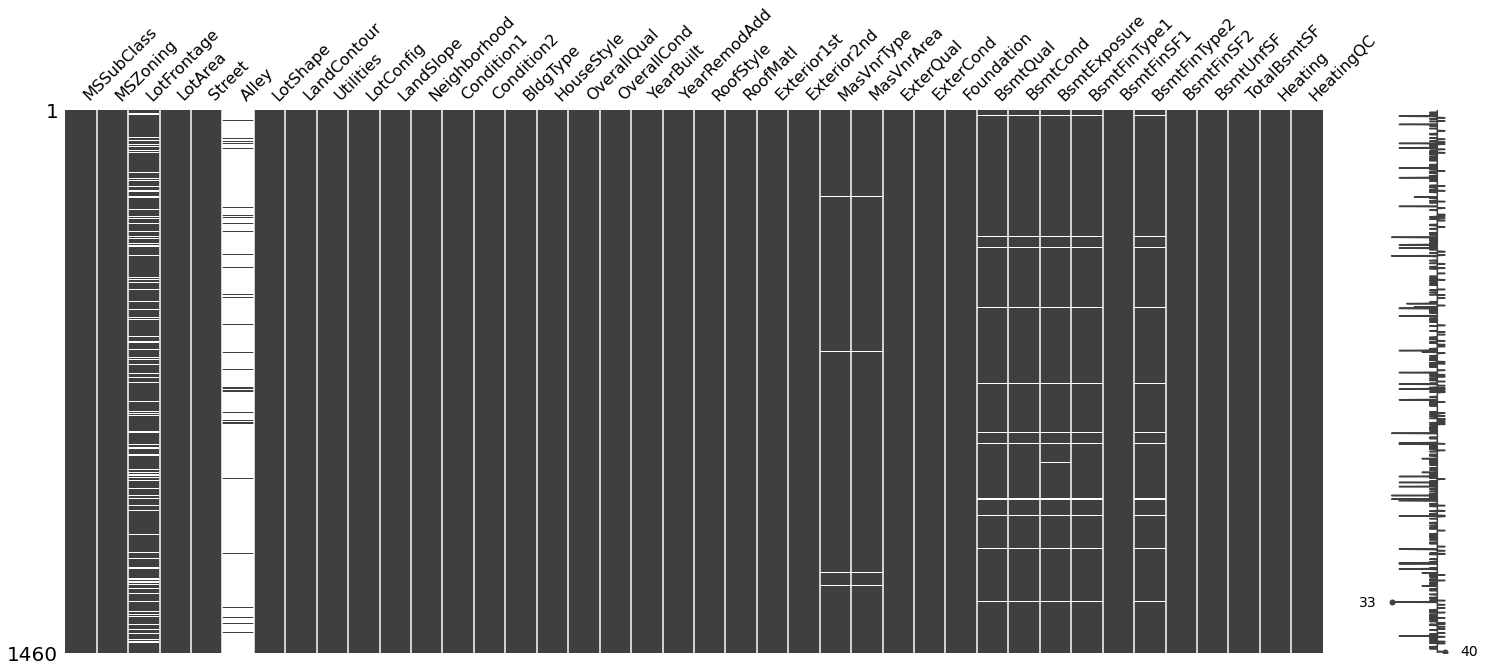

In [24]:
msno.matrix(df.iloc[:, :40])

<AxesSubplot:>

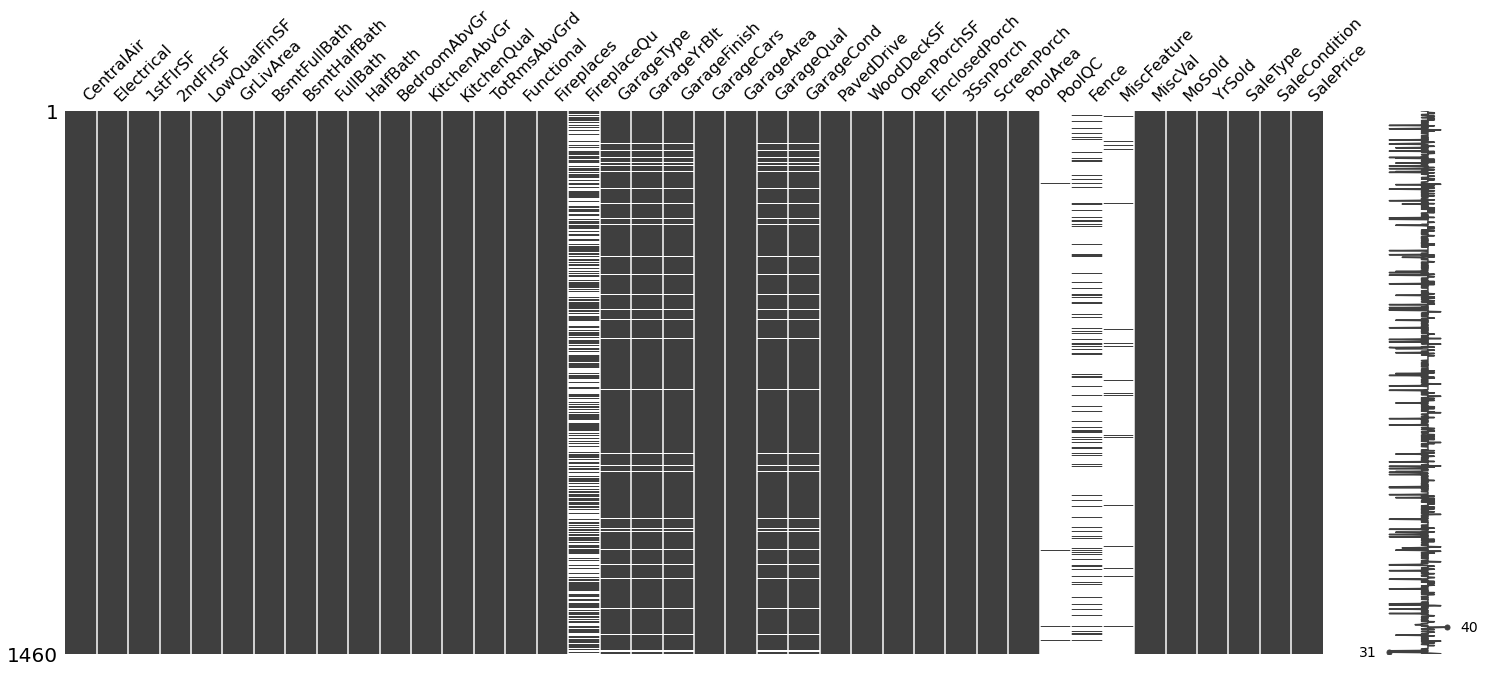

In [25]:
msno.matrix(df.iloc[:, 40:])

### FireplaceQu

In [29]:
df.loc[:, ["FireplaceQu"]]

FireplaceQu
Id              
1            NaN
2             TA
3             TA
4             Gd
5             TA
...          ...
1456          TA
1457          TA
1458          Gd
1459         NaN
1460         NaN

[1460 rows x 1 columns]

In [30]:
df.loc[:, ["Fireplaces", "FireplaceQu"]]

Fireplaces FireplaceQu
Id                          
1              0         NaN
2              1          TA
3              1          TA
4              1          Gd
5              1          TA
...          ...         ...
1456           1          TA
1457           2          TA
1458           2          Gd
1459           0         NaN
1460           0         NaN

[1460 rows x 2 columns]

## Tratamiento de Datos Faltantes

### Eliminación (caso MCAR)

Es el método más sencillo, se conoce tambien como **list-wise deletion** y consiste en eliminar filas o columnas de un dataset que presenten datos faltantes. Se puede acceder a este tipo de tratamiento por medio de `.dropna()` objetos de Pandas.

En casos distintos (MAR o MNAR) su uso es contraindicado. Se recomiendan cuando el patrón de perdida de información observada (por ejemplo por medio de `mssingno`) es claramente aleatorio, y si además las variables con información faltante son 'pocas' y con 'pocos' valores faltantes. La definición de 'poco' varia en función del problema, pero una buena huerística puede ser inferior al 15% en variables de poca importancia.


In [33]:
df.dropna(subset=["LotFrontage"])

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1456       0      8    2007        WD         Normal     175000  
1457       0      2    2010        WD         Normal     210000  
1458    2500      5    2010        WD         Normal     266500  
1459       0      4    2010        WD         Normal     142125  
1460       0      6    2008        WD         Normal     147500  

[1201 rows x 80 columns]


### Imputación (caso MCAR-MAR)

Corresponde a las téncincas que permiten rellenar de información faltante por medio de estimaciones. Es usada comunmente cuando los datos faltantes son de caracter MAR.


#### Imputación Simple

Por lo general este tipo de imputación presenta un buen rendimiento empírico en tareas de ciencia de datos y es ampliamente recomendado. 

> **Nota:** aplicar este tipo de métodos puede afectar el calculo de varianzas y covarianzas. 

En `pandas` podemos aplicar este tipo de imputación por medio del método `.fillna()` ya sea entregando un valor precalculado (media, mediana, moda, etc...) o utilizando los argumentos `ffill` (usar el valor anterior)  y `bfill` (usar el valor siguiente). 
En `scikit-learn` por otra parte, podemos utilizar [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer), el cual es una transformación, lo que hace este método compatible con los `Pipelines`.

Existen directrices a tener en cuenta al momento de tratar valores faltantes:

**1. Variables categóricas**:

    * Transformar valores faltantes en una nueva categoría.
    * Utilizar códificación Dummy en variables categóricas

In [34]:
df["GarageType"]

Id
1       Attchd
2       Attchd
3       Attchd
4       Detchd
5       Attchd
         ...  
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
1460    Attchd
Name: GarageType, Length: 1460, dtype: object

In [35]:
df["GarageType"].value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [36]:
df["GarageType"].isna()

Id
1       False
2       False
3       False
4       False
5       False
        ...  
1456    False
1457    False
1458    False
1459    False
1460    False
Name: GarageType, Length: 1460, dtype: bool

In [ ]:
df[df["GarageType"].isna()]["GarageType"]

In [37]:
garage_type = df["GarageType"].fillna("NoGarage")
garage_type.value_counts()

Attchd      870
Detchd      387
BuiltIn      88
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

**2. Valores Ordinales**

    * Agregar la categoría de valor faltante como orden inicial o final en categorias ordinales.


In [38]:
# ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
df["GarageCond"]

Id
1       TA
2       TA
3       TA
4       TA
5       TA
        ..
1456    TA
1457    TA
1458    TA
1459    TA
1460    TA
Name: GarageCond, Length: 1460, dtype: object

In [39]:
df["GarageCond"].value_counts(dropna=False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [40]:
garage_cond = df["GarageCond"].fillna("NoGarage")
# Agregar después al Encoder NoGarage ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
garage_cond.value_counts()

TA          1326
NoGarage      81
Fa            35
Gd             9
Po             7
Ex             2
Name: GarageCond, dtype: int64

**3 Valores continuos**:

    * En MAR notar que imputar los datos puede cambiar la distribución original y por ende, llevar a malos resultados.

In [41]:
df[df["LotFrontage"].isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
8             60       RL          NaN    10382   Pave   NaN      IR1   
13            20       RL          NaN    12968   Pave   NaN      IR2   
15            20       RL          NaN    10920   Pave   NaN      IR1   
17            20       RL          NaN    11241   Pave   NaN      IR1   
25            20       RL          NaN     8246   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1430          20       RL          NaN    12546   Pave   NaN      IR1   
1432         120       RL          NaN     4928   Pave   NaN      IR1   
1442         120       RM          NaN     4426   Pave   NaN      Reg   
1444          30       RL          NaN     8854   Pave   NaN      Reg   
1447          20       RL          NaN    26142   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
8            Lvl    AllPub    Corner  ...        0    NaN    NaN        Shed   
13           Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
15           Lvl    AllPub    Corner  ...        0    NaN   GdWo         NaN   
17           Lvl    AllPub   CulDSac  ...        0    NaN    NaN        Shed   
25           Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1430         Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
1432         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1442         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1444         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1447         Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
8        350     11    2009        WD         Normal     200000  
13         0      9    2008        WD         Normal     144000  
15         0      5    2008        WD         Normal     157000  
17       700      3    2010        WD         Normal     149000  
25         0      5    2010        WD         Normal     154000  
...      ...    ...     ...       ...            ...        ...  
1430       0      4    2007        WD         Normal     182900  
1432       0     10    2009        WD         Normal     143750  
1442       0      5    2008        WD         Normal     149300  
1444       0      5    2009        WD         Normal     121000  
1447       0      4    2010        WD         Normal     157900  

[259 rows x 80 columns]

In [42]:
df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

En este caso, usaremos `SimpleImputer`.

La estrategia se define por el parámetro:

`strategy`, default=’mean’

    The imputation strategy.

        If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.

        If “median”, then replace missing values using the median along each column. Can only be used with numeric data.

        If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

        If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.


In [43]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy="median")

imputed_lotfrontage = si.fit_transform(df.loc[:, ["LotFrontage"]])

imputed_lotfrontage = pd.DataFrame(imputed_lotfrontage, columns=["ImputedLotFrontage"])

imputed_lotfrontage

ImputedLotFrontage
0                   65.0
1                   80.0
2                   68.0
3                   60.0
4                   84.0
...                  ...
1455                62.0
1456                85.0
1457                66.0
1458                68.0
1459                75.0

[1460 rows x 1 columns]

In [44]:
imputed_lotfrontage.describe()

ImputedLotFrontage
count         1460.000000
mean            69.863699
std             22.027677
min             21.000000
25%             60.000000
50%             69.000000
75%             79.000000
max            313.000000

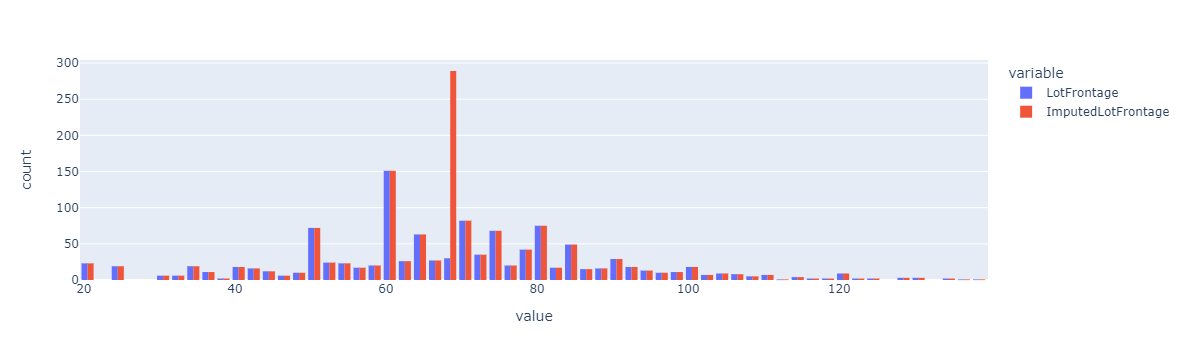

In [45]:
import plotly.express as px

lf = pd.concat((df.loc[:, ["LotFrontage"]], imputed_lotfrontage))
px.histogram(lf, barmode="group")

#### Imputación Multivariada

Un problema de la imputación singular es que modela los datos como uno completo, sin considerar la incertidumbre inherente a todos los otros datos. Una solución para esto son los métodos de imputación múltiple.

Un método de inmputación multiple estima los valores faltantes a partir de otros. Puede ser tanto univariada (solo considerando la variable objetivo) como multivariada.

##### `IterativeImputer`

Un enfoque sofisticado es el que plantea `IterativeImputer`, el cuál intenta modelar los valores faltantes a partir como función de los otros valores. El algoritmo que ocupa es el siguiente:

En la primera iteración:
- Por cada columna con datos faltantes:
   - Se entrena un regresor que intenta predecir los valores de esa columna a partir de todas las otras. El regresor usa como target los valores no faltantes de la columna objetivo.
   - Se reemplazan los valores faltantes por los predichos por el regresor.
   
Luego, se repite `max_iter` cantidad de veces el mismo procedimiento, usando los valores originales y también los valores predichos en la etapa anterior. La idea de esto es que este procedimiento iterativo vaya "actualizando" hasta que los valores predichos convergan.

Su uso es experimental y se activa siguiendo la sintaxis:

```python
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
```

**Ejemplo**

Se utiliza el imputador iterativo para los estimadores de Random Forest y KNN.

**NOTA IMPORTANTE**: El siguiente código es solo de ejemplo y se asume que todas las variables son MAR, puede que no sea correcto imputar estas features.

In [48]:
import numpy as np

only_numeric = df.select_dtypes(include=np.number).drop(
    columns=[
        "YearBuilt",
        "YearRemodAdd",
        "YrSold",
        "GarageYrBlt",
        "SalePrice",
        "MoSold",
        "MSSubClass",
    ]
)
only_numeric

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
Id                                                                             
1            65.0     8450            7            5       196.0         706   
2            80.0     9600            6            8         0.0         978   
3            68.0    11250            7            5       162.0         486   
4            60.0     9550            7            5         0.0         216   
5            84.0    14260            8            5       350.0         655   
...           ...      ...          ...          ...         ...         ...   
1456         62.0     7917            6            5         0.0           0   
1457         85.0    13175            6            6       119.0         790   
1458         66.0     9042            7            9         0.0         275   
1459         68.0     9717            5            6         0.0          49   
1460         75.0     9937            5            6         0.0         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  Fireplaces  \
Id                                                  ...               
1              0        150          856       856  ...           0   
2              0        284         1262      1262  ...           1   
3              0        434          920       920  ...           1   
4              0        540          756       961  ...           1   
5              0        490         1145      1145  ...           1   
...          ...        ...          ...       ...  ...         ...   
1456           0        953          953       953  ...           1   
1457         163        589         1542      2073  ...           2   
1458           0        877         1152      1188  ...           2   
1459        1029          0         1078      1078  ...           0   
1460         290        136         1256      1256  ...           0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id                                                                     
1              2         548           0           61              0   
2              2         460         298            0              0   
3              2         608           0           42              0   
4              3         642           0           35            272   
5              3         836         192           84              0   
...          ...         ...         ...          ...            ...   
1456           2         460           0           40              0   
1457           2         500         349            0              0   
1458           1         252           0           60              0   
1459           1         240         366            0            112   
1460           1         276         736           68              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  
Id                                               
1             0            0         0        0  
2             0            0         0        0  
3             0            0         0        0  
4             0            0         0        0  
5             0            0         0        0  
...         ...          ...       ...      ...  
1456          0            0         0        0  
1457          0            0         0        0  
1458          0            0         0     2500  
1459          0            0         0        0  
1460          0            0         0        0  

[1460 rows x 30 columns]

##### IterativeImputer 

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

<AxesSubplot:>

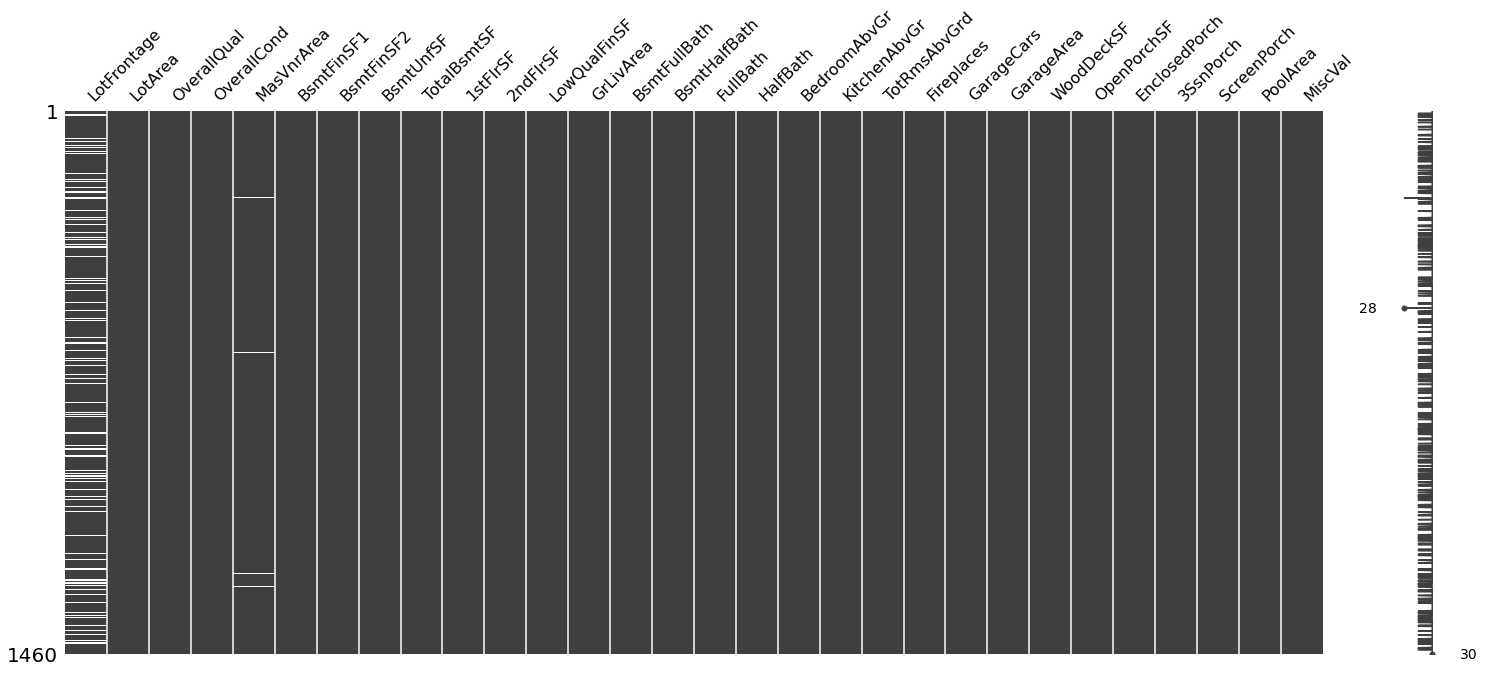

In [49]:
msno.matrix(only_numeric)

In [50]:
imputer = IterativeImputer(skip_complete=True, verbose=1, random_state=1)

RF_imputed = imputer.fit_transform(only_numeric)
RF_imputed = pd.DataFrame(RF_imputed, columns=only_numeric.columns)
RF_imputed

[IterativeImputer] Completing matrix with shape (1460, 30)
[IterativeImputer] Change: 183.6324355517475, scaled tolerance: 215.245 
[IterativeImputer] Early stopping criterion reached.


LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0            65.0   8450.0          7.0          5.0       196.0       706.0   
1            80.0   9600.0          6.0          8.0         0.0       978.0   
2            68.0  11250.0          7.0          5.0       162.0       486.0   
3            60.0   9550.0          7.0          5.0         0.0       216.0   
4            84.0  14260.0          8.0          5.0       350.0       655.0   
...           ...      ...          ...          ...         ...         ...   
1455         62.0   7917.0          6.0          5.0         0.0         0.0   
1456         85.0  13175.0          6.0          6.0       119.0       790.0   
1457         66.0   9042.0          7.0          9.0         0.0       275.0   
1458         68.0   9717.0          5.0          6.0         0.0        49.0   
1459         75.0   9937.0          5.0          6.0         0.0       830.0   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  Fireplaces  \
0            0.0      150.0        856.0     856.0  ...         0.0   
1            0.0      284.0       1262.0    1262.0  ...         1.0   
2            0.0      434.0        920.0     920.0  ...         1.0   
3            0.0      540.0        756.0     961.0  ...         1.0   
4            0.0      490.0       1145.0    1145.0  ...         1.0   
...          ...        ...          ...       ...  ...         ...   
1455         0.0      953.0        953.0     953.0  ...         1.0   
1456       163.0      589.0       1542.0    2073.0  ...         2.0   
1457         0.0      877.0       1152.0    1188.0  ...         2.0   
1458      1029.0        0.0       1078.0    1078.0  ...         0.0   
1459       290.0      136.0       1256.0    1256.0  ...         0.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0            2.0       548.0         0.0         61.0            0.0   
1            2.0       460.0       298.0          0.0            0.0   
2            2.0       608.0         0.0         42.0            0.0   
3            3.0       642.0         0.0         35.0          272.0   
4            3.0       836.0       192.0         84.0            0.0   
...          ...         ...         ...          ...            ...   
1455         2.0       460.0         0.0         40.0            0.0   
1456         2.0       500.0       349.0          0.0            0.0   
1457         1.0       252.0         0.0         60.0            0.0   
1458         1.0       240.0       366.0          0.0          112.0   
1459         1.0       276.0       736.0         68.0            0.0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  
0           0.0          0.0       0.0      0.0  
1           0.0          0.0       0.0      0.0  
2           0.0          0.0       0.0      0.0  
3           0.0          0.0       0.0      0.0  
4           0.0          0.0       0.0      0.0  
...         ...          ...       ...      ...  
1455        0.0          0.0       0.0      0.0  
1456        0.0          0.0       0.0      0.0  
1457        0.0          0.0       0.0   2500.0  
1458        0.0          0.0       0.0      0.0  
1459        0.0          0.0       0.0      0.0  

[1460 rows x 30 columns]

<AxesSubplot:>

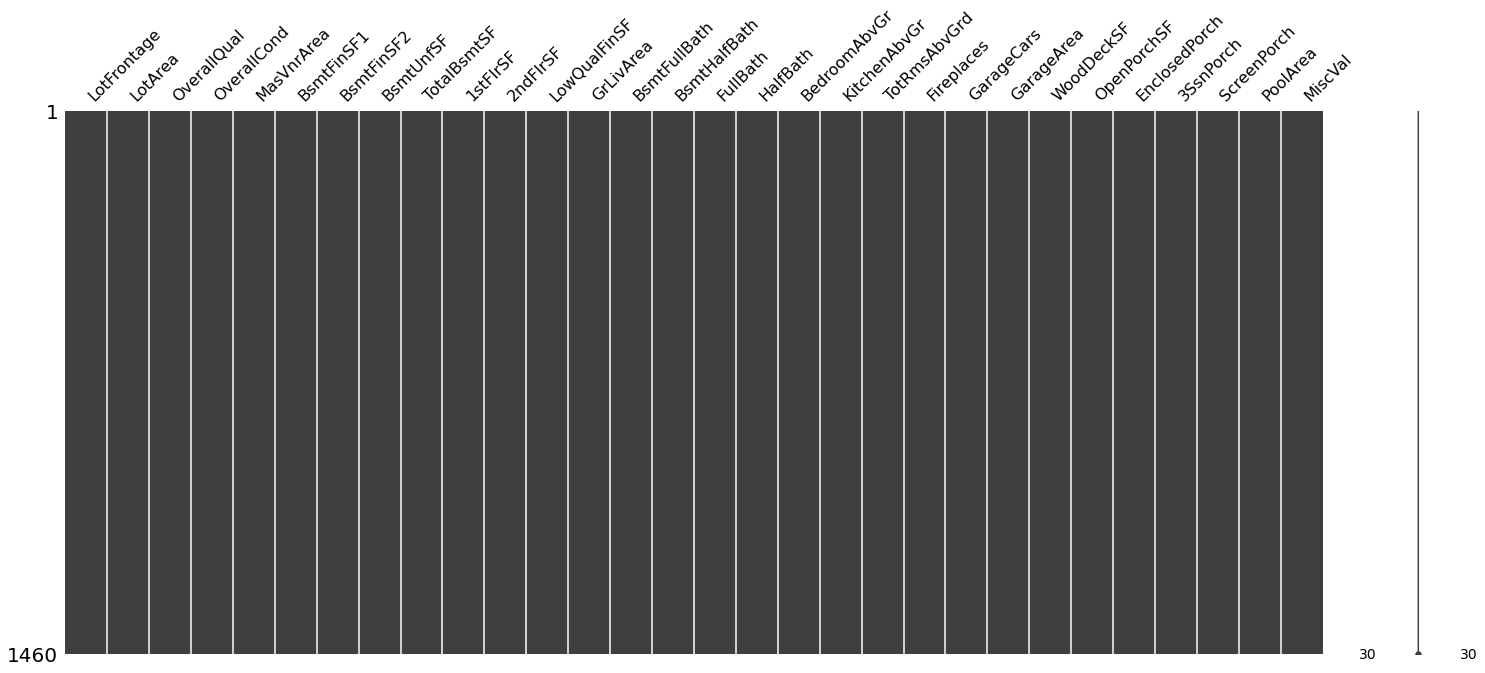

In [51]:
msno.matrix(RF_imputed)

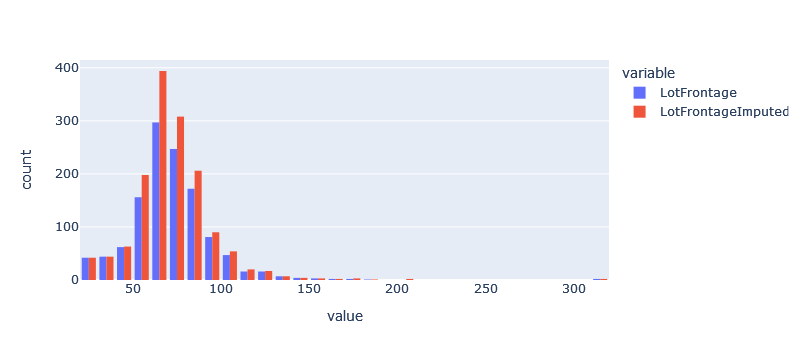

In [52]:
lf_imputed = RF_imputed.loc[:, ["LotFrontage"]]
lf_imputed.columns = ["LotFrontageImputed"]

lf = pd.concat((df.loc[:, ["LotFrontage"]], lf_imputed))
px.histogram(lf, barmode="group", nbins=50)

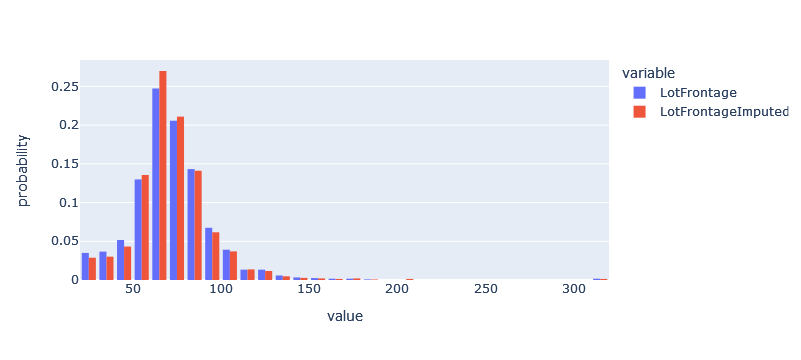

In [53]:
px.histogram(lf, barmode="group", nbins=50, histnorm="probability")

##### KNNImputer

Imputa usando k-Nearest Neighbors.

Los valores imputados se calculan según el parámetro `weights`:

- Si `weights=uniform`, se promedian los valores de los vecinos cercanos.
- Si `weights=distance`, se ponderan los valores de los vecinos cercanos según la distancia al punto.

<img src='./resources/knn.png' width=400/> 

In [54]:
from sklearn.impute import KNNImputer

# en este caso, simplemente se promedian los valores cercanos.
KNNimputer = KNNImputer(n_neighbors=2, weights="uniform")
KNN_imputed_data = KNNimputer.fit_transform(only_numeric)
KNN_imputed_data = pd.DataFrame(KNN_imputed_data, columns=only_numeric.columns)

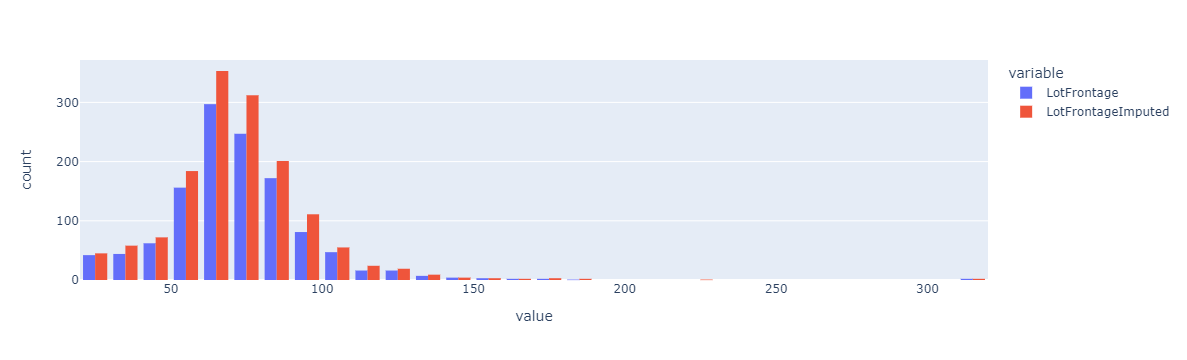

In [55]:
lf_imputed = KNN_imputed_data.loc[:, ["LotFrontage"]]
lf_imputed.columns = ["LotFrontageImputed"]

lf = pd.concat((df.loc[:, ["LotFrontage"]], lf_imputed))
px.histogram(lf, barmode="group", nbins=50)

### Incluyendo la imputación en nuestra Pipeline

Nota que ambos métodos pueden ser usados en un Pipeline.

In [56]:
cat_cols = [
    "MSZoning",
    "Street",
    "Alley",
    "LandContour",
    "LotConfig",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "Foundation",
    "Heating",
    "CentralAir",
    "Electrical",
    "GarageType",
    "PavedDrive",
    "MiscFeature",
    "SaleType",
    "SaleCondition",
]

In [58]:
# Preprocesador Compuesto: Inputación + Escalamiento/Codificación.

# Pipeline Numerica
num_pipe = Pipeline(
    steps=[
        ("imputer_num", KNNImputer(n_neighbors=2, weights="uniform")),
        ("scaler", StandardScaler()),
    ]
)

# Pipeline categorica
cat_pipe = Pipeline(
    steps=[
        ("imputer_cat", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(sparse=False, handle_unknown="ignore")),
    ]
)

# Pipeline Ordinal
ord_pipe = Pipeline(
    steps=[
        ("imputer_ord", SimpleImputer(strategy="constant", fill_value="NA")),
        ("ordinal", OrdinalEncoder(categories=ordinal_cat)),
    ]
)

# Preprocesador Compuesto
prep = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
        ("ord", ord_pipe, ordinal_cols),
    ]
)

prep

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer_num',
                                                  KNNImputer(n_neighbors=2)),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', '...
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['NA',
                                    